# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import calendar

# Understanding The Data

In [3]:
data=pd.read_csv(r'C:\Users\Nishant Sharma\Downloads\Uber Drives - .csv', encoding = 'unicode_escape')

In [4]:
data.shape

(1156, 7)

In [5]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Finding Null values

In [7]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

## Droping Null values

In [8]:
data=data.dropna()

In [9]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

## Formating Data Values

In [10]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format='%m/%d/%Y  %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format='%m/%d/%Y  %H:%M')

In [11]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [13]:
data['CATEGORY*'].value_counts()

CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64

## Categories We Have

<Axes: xlabel='CATEGORY*', ylabel='count'>

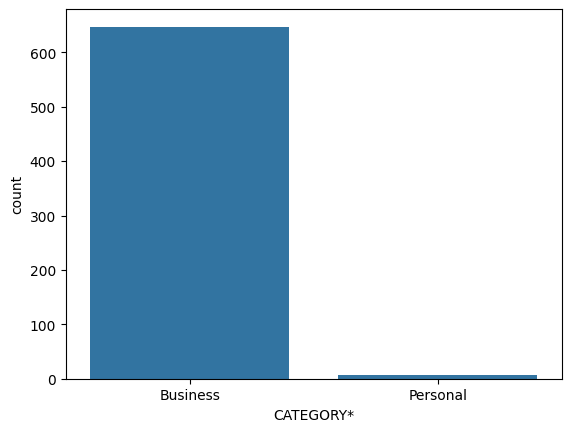

In [32]:
sns.countplot(x='CATEGORY*', data = data)

## How Long do people travel with Uber

<Axes: ylabel='Frequency'>

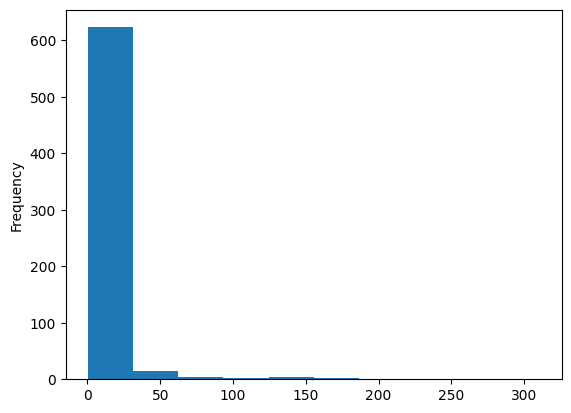

In [33]:
data['MILES*'].plot.hist()

## Extract and Append Date Data

In [39]:
hour = []
day = []
dayofweek = []
month = []
weekday= []

for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])

data['HOUR'] = hour
data['DAY'] = day
data['DAYOFWEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday

In [40]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAYOFWEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


## What hour do most People take Uber to their Destination

Text(0.5, 1.0, 'Number of Trips vs Hours')

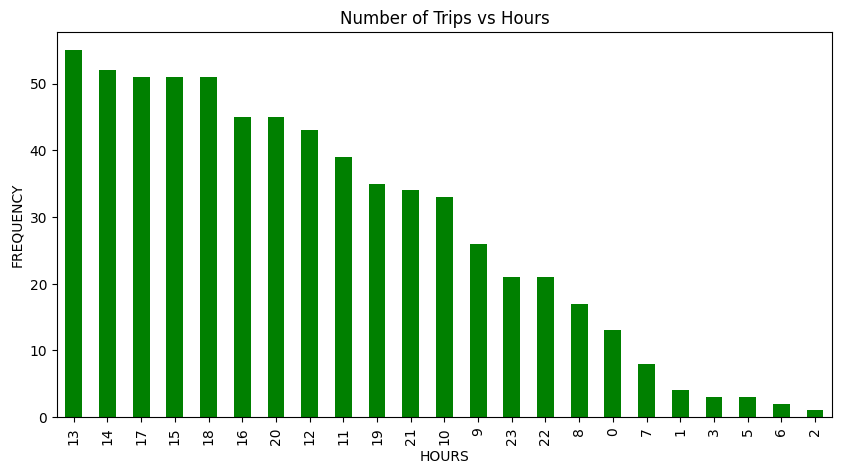

In [41]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot (kind = 'bar', color ='green', figsize = (10, 5))
plt.xlabel('HOURS')
plt.ylabel('FREQUENCY')
plt.title('Number of Trips vs Hours')

## Checking the Purpose of Trips

<Axes: xlabel='PURPOSE*'>

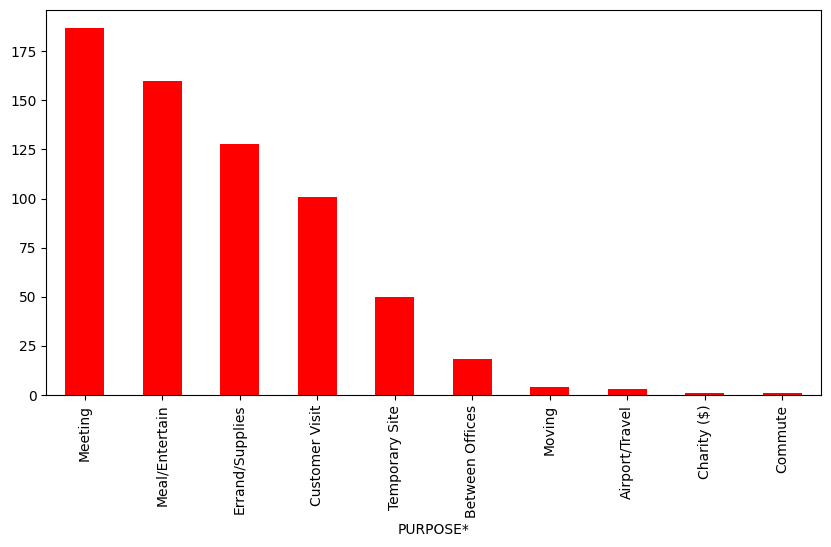

In [43]:
data['PURPOSE*'].value_counts().plot (kind = 'bar', color ='red', figsize = (10, 5))

## Which Day has the Highest Number of Trips

<Axes: xlabel='WEEKDAY'>

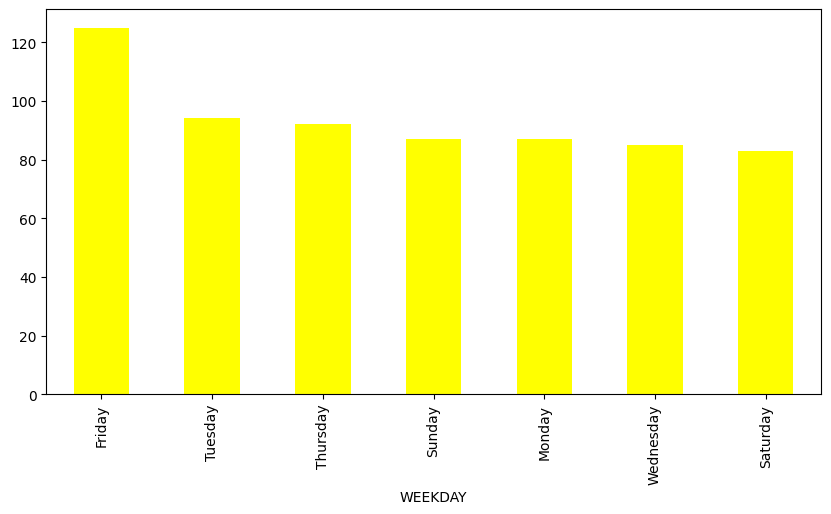

In [44]:
data['WEEKDAY'].value_counts().plot (kind = 'bar', color ='Yellow', figsize = (10, 5))

## What are the Number of trips each day

<Axes: xlabel='DAY'>

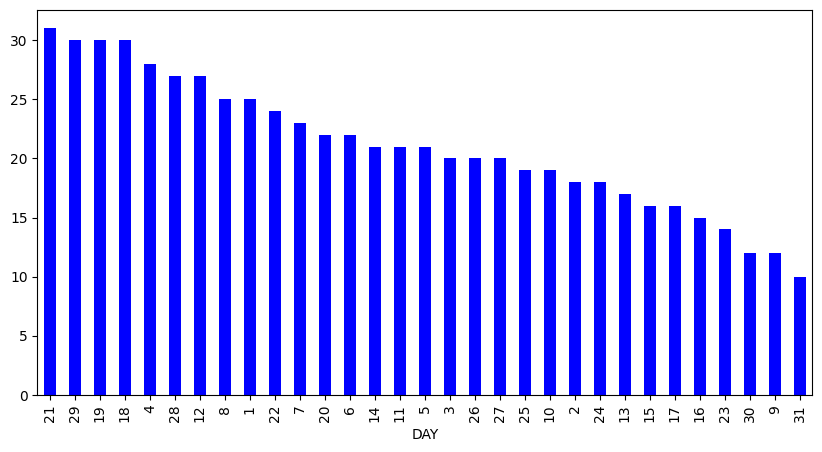

In [45]:
data['DAY'].value_counts().plot (kind = 'bar', color ='blue', figsize = (10, 5))

## Which Month has the Most Trips

<Axes: xlabel='MONTH'>

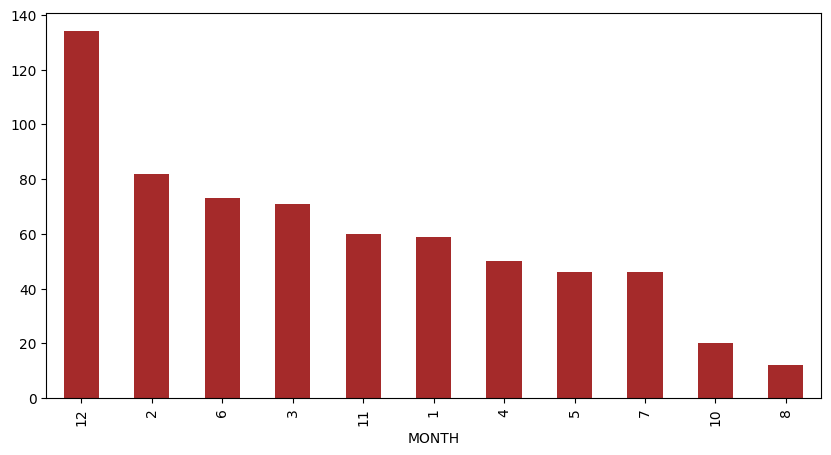

In [46]:
data['MONTH'].value_counts().plot (kind = 'bar', color ='Brown', figsize = (10, 5))

## Where do people like to Board their Trip Most

<Axes: xlabel='START*'>

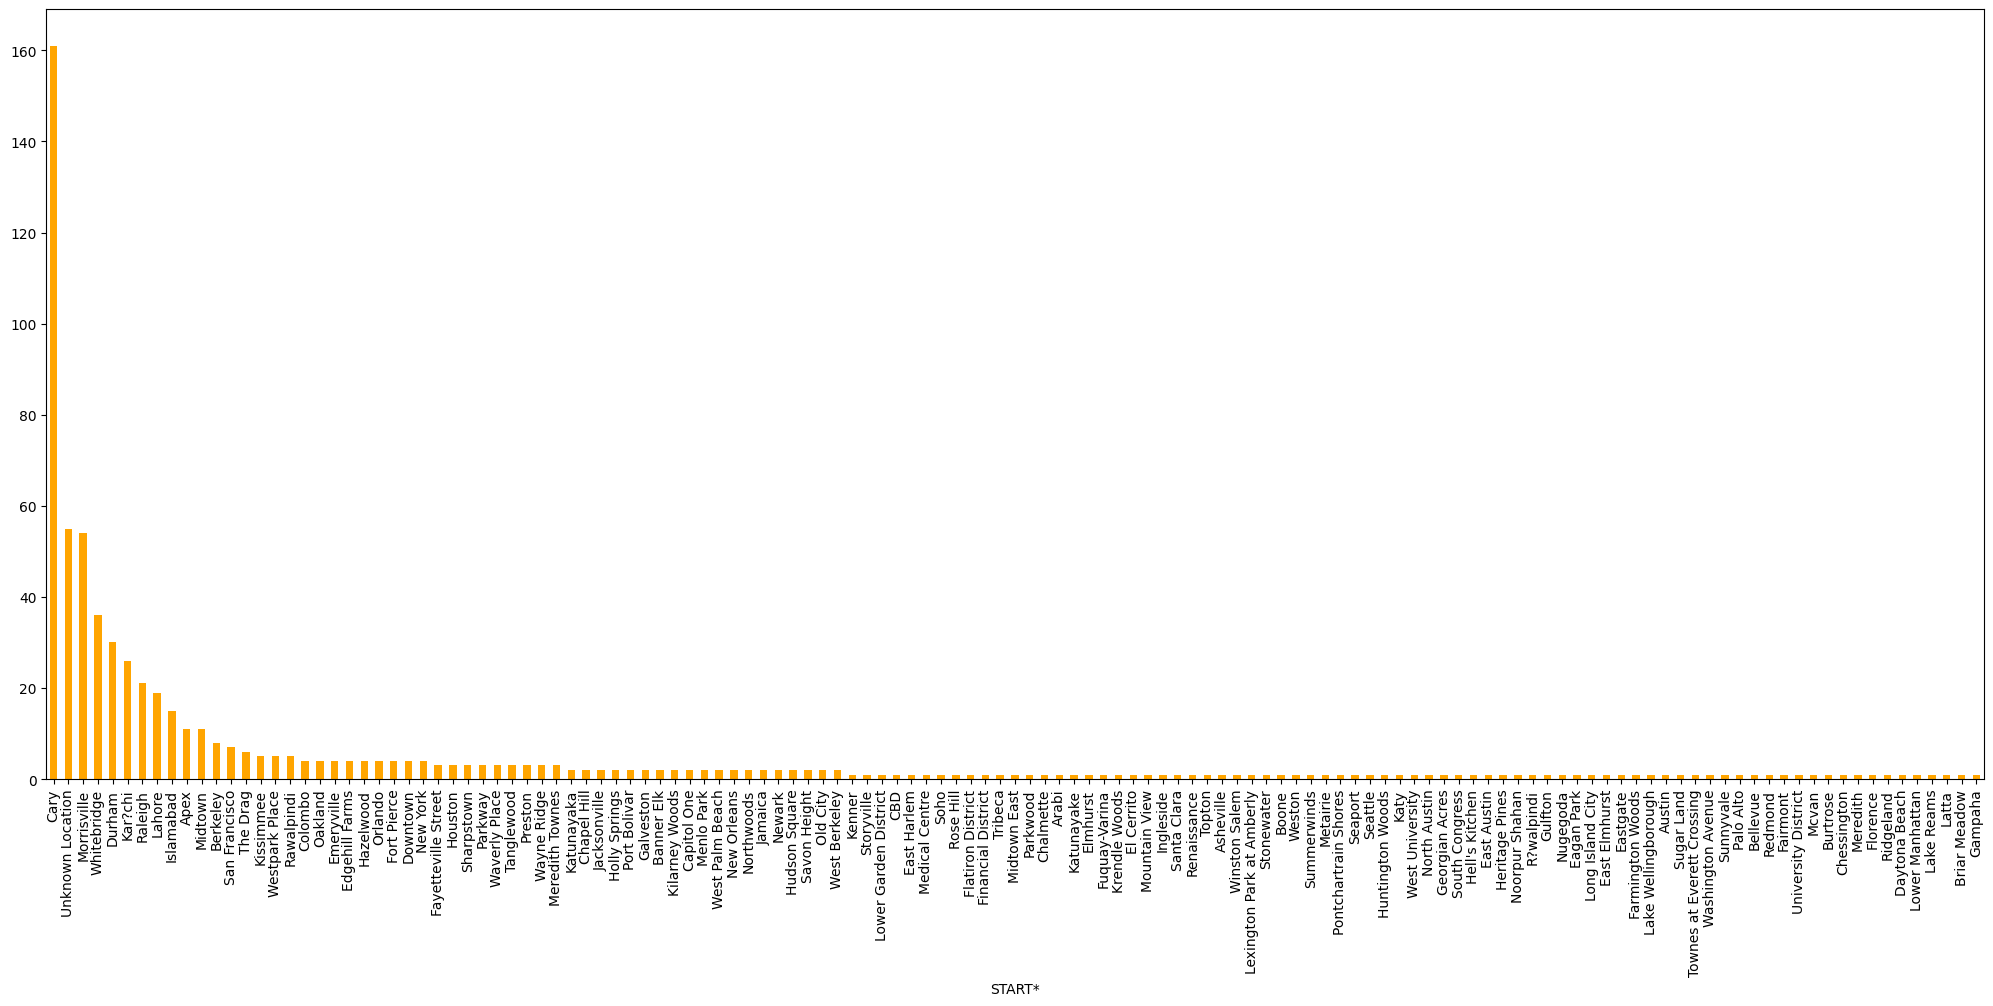

In [48]:
data['START*'].value_counts().plot (kind = 'bar', color ='orange', figsize = (25, 10))

# Conclusion

### Businesspersons take Uber most from Cary at 1:00 pm for their Meetings on Friday, 21st of December.

# Thank You